<div style="background: linear-gradient(to right, #d32f2f, #e53935); padding: 15px; border-radius: 9px; text-align: center; color: white; font-family: Arial, sans-serif; box-shadow:  4px 10px rgba(0,0,0,0.2); margin: 0px 0;">
  <h1 style="font-size: 2.2em; margin: 10px 0; font-weight: bold;">
     DigiKala Sales Data Analysis 
  </h1>
</div>

### Importing Libraries & Initial Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns  
import jdatetime
import matplotlib.ticker as ticker
import arabic_reshaper
from bidi.algorithm import get_display
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:,.0f}'.format)

In [2]:
def _(text):
    reshaped = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped)
    return bidi_text

### Load the main orders dataset from CSV file

In [3]:
data_orders = pd.read_csv("orders.csv")

data_orders.shape

(200000, 7)

###  Display first 5 rows of the dataset

In [4]:
data_orders.head()

,ID_Order,ID_Customer,ID_Item,DateTime_CartFinalize,Amount_Gross_Order,city_name_fa,Quantity_item
0,2714054,469662,21386,2015-10-15 08:50:56.000,"597,982",محمود آباد,1
1,11104039,3063877,248497,2018-02-11 00:29:26.000,"980,000",خرمدره,1
2,4228130,3184893,50144,2016-06-14 00:30:08.000,"229,358",قرچک,1
3,22225624,6888562,70208,2018-09-03 14:37:19.000,"16,514",قم,1
4,4068771,2533490,67627,2016-05-21 11:51:02.000,"133,028",تهران,1


### Number of unique values ​​in each column

In [5]:
data_orders.nunique()

ID_Order                 197631
ID_Customer              151634
ID_Item                   95232
DateTime_CartFinalize    197293
Amount_Gross_Order        22416
city_name_fa                906
Quantity_item                44
dtype: int64

### Show dataset structure

In [6]:
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Order               200000 non-null  int64  
 1   ID_Customer            200000 non-null  int64  
 2   ID_Item                200000 non-null  int64  
 3   DateTime_CartFinalize  200000 non-null  object 
 4   Amount_Gross_Order     200000 non-null  float64
 5   city_name_fa           200000 non-null  object 
 6   Quantity_item          200000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 10.7+ MB


### Rename the column

In [7]:
data_orders.rename(columns={'DateTime_CartFinalize' : 'Order_Date'}, inplace=True)

### Count total number of duplicate rows in the dataset

In [8]:
data_orders.duplicated().sum()

np.int64(0)

In [9]:
data_orders["Amount_Gross_Order"].describe()

count         200,000
mean        1,458,204
std         5,450,972
min                 0
25%           121,273
50%           321,101
75%         1,011,032
max     1,530,000,000
Name: Amount_Gross_Order, dtype: float64

### Replaces gross amounts below 100 with the median price per item; if the median equals the original value (indicating a unique outlier), it sets the value to NaN and then drops such rows.

In [10]:
median_per_item = data_orders.groupby("ID_Item")["Amount_Gross_Order"].transform("median")

data_orders["Amount_Gross_Order"] = np.where(
    data_orders["Amount_Gross_Order"] < 100,
    np.where(median_per_item == data_orders["Amount_Gross_Order"], np.nan, median_per_item),
    data_orders["Amount_Gross_Order"]
)

data_orders.dropna(inplace=True)

### Convert to datetime and sort chronologically

In [11]:
data_orders['Order_Date'] = pd.to_datetime(data_orders['Order_Date'])

data_orders.sort_values(by='Order_Date', inplace=True)

### Add Persian (Shamsi) date column from Gregorian datetime

In [12]:
data_orders['Order_Date_Shamsi'] = data_orders['Order_Date'].apply(
    lambda x: jdatetime.date.fromgregorian(date=x.date()) if pd.notnull(x) else None
)

###  Extract Shamsi year, month, and weekday from 'Order_Date_Shamsi'

In [13]:
data_orders['Year'] = data_orders['Order_Date_Shamsi'].apply(lambda x : x.year)
data_orders['Month'] = data_orders['Order_Date_Shamsi'].apply(lambda x : x.month)
data_orders['day_of_week'] = data_orders['Order_Date_Shamsi'].apply(lambda x: x.strftime('%A'))
data_orders['Hour'] = data_orders['Order_Date'].dt.hour

data_orders

,ID_Order,ID_Customer,ID_Item,Order_Date,Amount_Gross_Order,city_name_fa,Quantity_item,Order_Date_Shamsi,Year,Month,day_of_week,Hour
69768,1000740,609924,6906,2013-09-27 12:03:00,"812,453",قم,1,1392-07-05,1392,7,Friday,12
153955,1000411,720568,8777,2013-09-27 19:43:00,"3,254,717",تهران,1,1392-07-05,1392,7,Friday,19
72224,1000977,695557,3136,2013-09-27 22:26:00,"8,764,151",شهرکرد,1,1392-07-05,1392,7,Friday,22
185193,1000919,470250,1532,2013-09-28 12:04:00,"926,226",زنجان,2,1392-07-06,1392,7,Saturday,12
160662,1002123,531450,8045,2013-09-29 22:08:00,"9,433,585",رشت,1,1392-07-07,1392,7,Sunday,22
...,...,...,...,...,...,...,...,...,...,...,...,...
154568,24846101,548325,1402280,2018-12-11 03:19:28,"204,000",تهران,1,1397-09-20,1397,9,Tuesday,3
160070,24846343,5988160,1840495,2018-12-11 03:54:39,"188,500",تهران,1,1397-09-20,1397,9,Tuesday,3
5343,24846353,2614410,1903360,2018-12-11 03:55:47,"220,000",شیراز,1,1397-09-20,1397,9,Tuesday,3
38450,24846426,755895,2093722,2018-12-11 04:16:28,"500,000",تهران,1,1397-09-20,1397,9,Tuesday,4


#### Calculate the total gross amount of the order by multiplying the gross amount of each order by the number of items in that order.

In [14]:
data_orders['TotalGrossValue'] = data_orders['Amount_Gross_Order'] * data_orders['Quantity_item']

### Show the dispersion of quantity and price per year

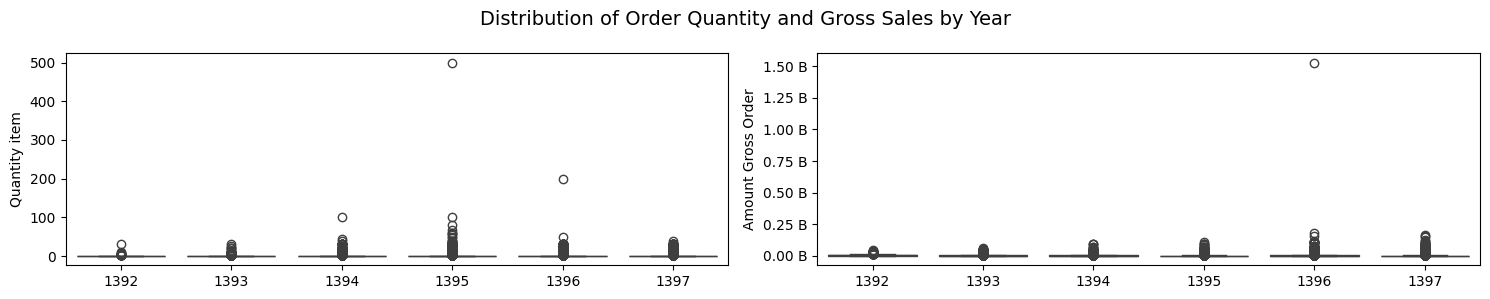

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 3))

sns.color_palette("rocket")

def millions_formatter(x, pos):
    return f'{x*1e-9:,.2f} B' 

sns.boxplot(x="Year", y="Quantity_item", data=data_orders, ax=axes[0])
axes[0].set_ylabel('Quantity item')
axes[0].set_xlabel('')

sns.boxplot(x="Year", y="Amount_Gross_Order", data=data_orders, ax=axes[1])
axes[1].set_ylabel('Amount Gross Order')
axes[1].set_xlabel('')

axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
fig.suptitle('Distribution of Order Quantity and Gross Sales by Year', fontsize=14)
plt.tight_layout()
plt.show()

### Statistical summary including mean, standard deviation, minimum, maximum, and quartiles of numeric columns

In [16]:
data_orders.describe()

,ID_Order,ID_Customer,ID_Item,Order_Date,Amount_Gross_Order,Quantity_item,Year,Month,Hour,TotalGrossValue
count,"199,731","199,731","199,731",199731,"199,731","199,731","199,731","199,731","199,731","199,731"
mean,"9,875,616","2,860,786","375,855",2017-06-10 17:18:37.283340800,"1,460,180",1,"1,396",7,13,"1,582,249"
min,"1,000,411","466,132",76,2013-09-27 12:03:00,100,1,"1,392",1,0,100
25%,"5,019,574","1,020,816","89,445",2016-09-20 10:31:39.500000,"123,853",1,"1,395",4,10,"138,440"
50%,"8,595,351","2,895,041","230,527",2017-09-16 21:26:02,"321,101",1,"1,396",7,14,"361,111"
75%,"12,465,221","4,179,550","519,538",2018-04-19 12:48:56.500000,"1,018,349",1,"1,397",9,18,"1,159,950"
max,"24,846,558","7,282,118","2,093,722",2018-12-11 04:47:23,"1,530,000,000",500,"1,397",12,23,"1,530,000,000"
std,"6,406,926","1,922,191","395,030",NaN,"5,454,376",2,1,3,7,"5,846,128"


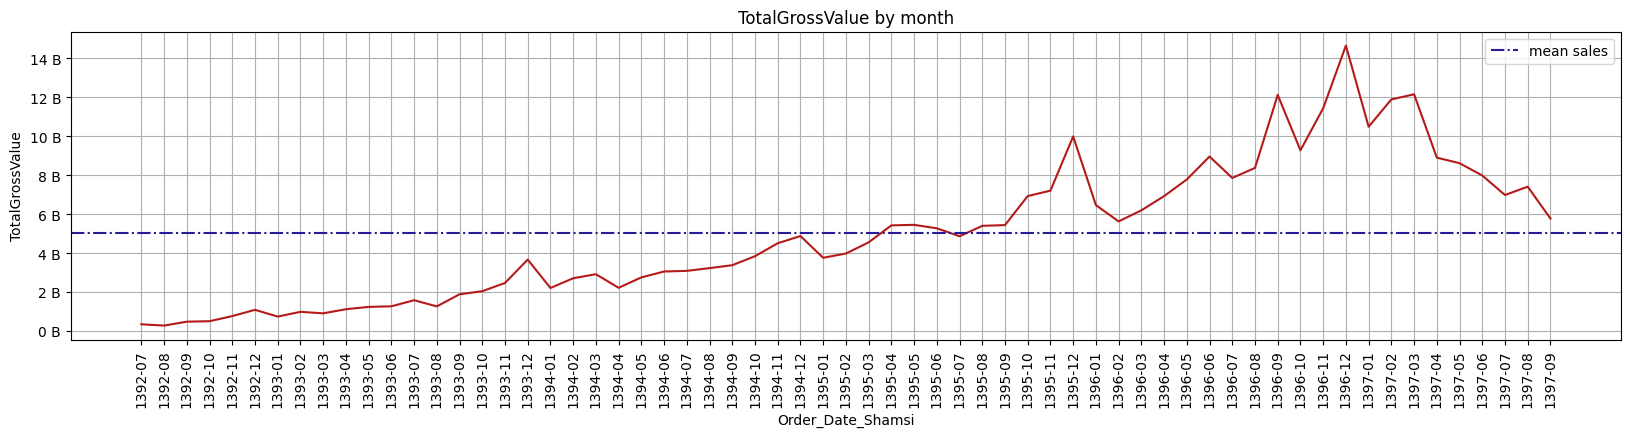

In [17]:
date_sales = data_orders.groupby(data_orders['Order_Date_Shamsi'].apply(
    lambda x : f'{x.year}-{x.month:02d}'
))['TotalGrossValue'].sum().reset_index()

def tillions_formatter(x, pos):
    return f'{x*1e-9:.0f} B' 

fig, ax = plt.subplots(figsize=(20, 4))

plt.xticks(rotation=90)
plt.grid()
plt.title('TotalGrossValue by month')
sns.lineplot(x="Order_Date_Shamsi", y="TotalGrossValue", data=date_sales, color="#B51A1A")
plt.axhline(date_sales['TotalGrossValue'].mean(), color="#271C97", linestyle='-.', label='mean sales')
plt.legend()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(tillions_formatter))

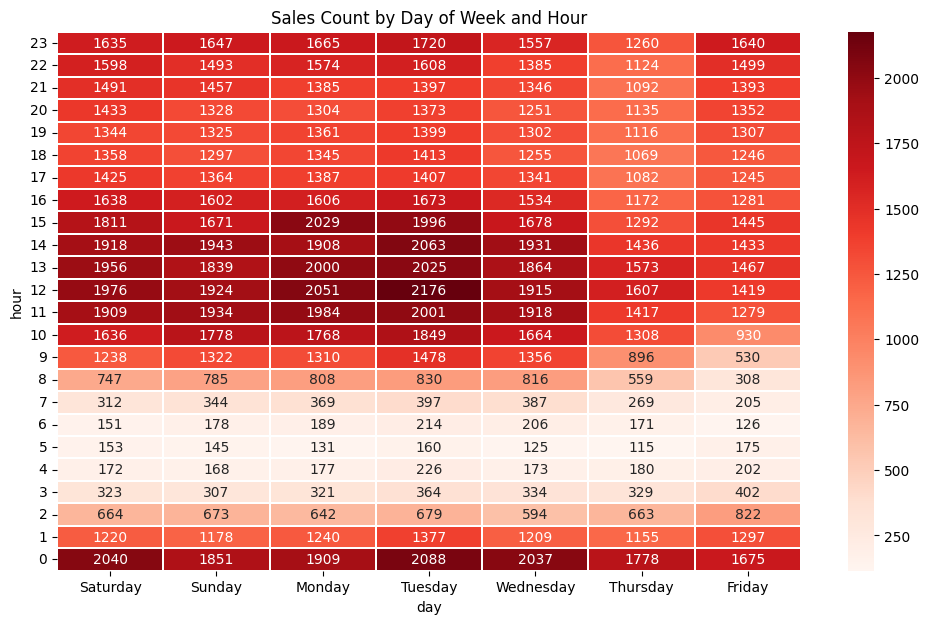

In [18]:
data_pivot = data_orders.groupby(['day_of_week','Hour']).size().reset_index(name='Count')

# استفاده صحیح از pivot
heatmap_data = data_pivot.pivot(index='Hour', columns='day_of_week', values='Count')

heatmap_data = heatmap_data.iloc[::-1]

weekday_name_sorted = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

heatmap_data = heatmap_data[weekday_name_sorted]

plt.figure(figsize=(12,7))
sns.heatmap(heatmap_data, cmap='Reds', annot=True, fmt="d", cbar=True, linewidths=0.1)
plt.yticks(rotation=0)
plt.xlabel("day")
plt.ylabel("hour")
plt.title("Sales Count by Day of Week and Hour")
plt.show()


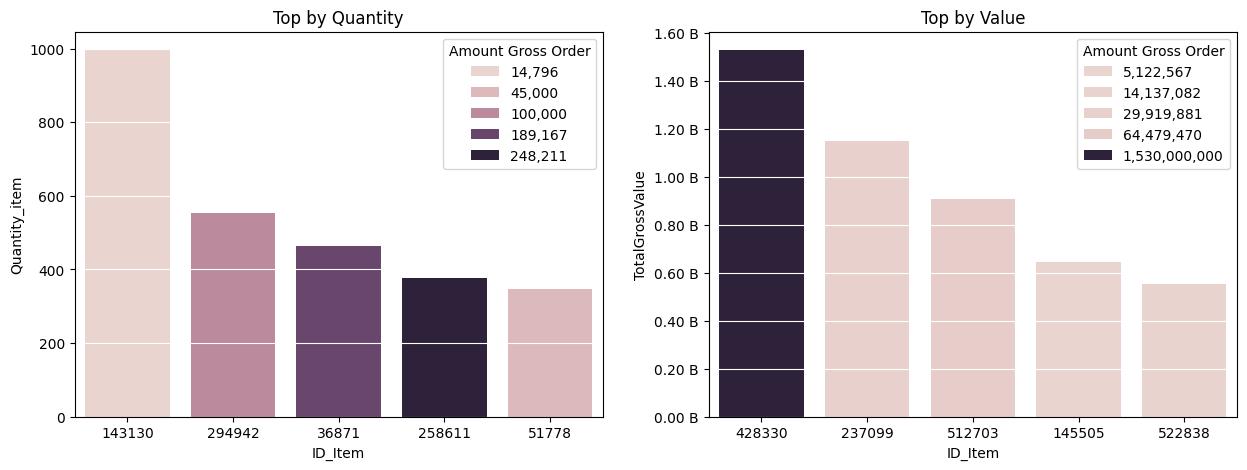

In [19]:
top_items = data_orders.groupby(['ID_Item'])\
    .agg({'Quantity_item': 'sum', 'Amount_Gross_Order': 'mean', 'TotalGrossValue': 'sum'})\
    .sort_values(by='Quantity_item', ascending=False)\
    .reset_index()

top_qty   = top_items.sort_values('Quantity_item', ascending=False).head(5)
top_value = top_items.sort_values('TotalGrossValue', ascending=False).head(5)

def plot_bar(ax, data, y, title=None, formatter=None):
    sns.barplot(x='ID_Item', y=y, hue='Amount_Gross_Order', data=data, order=data['ID_Item'].unique(), ax=ax)
    handles, labels = ax.get_legend_handles_labels()
    new_labels = [f'{int(float(i)):,}' for i in labels]
    ax.legend(handles, new_labels, title='Amount Gross Order')
    ax.grid(axis='y', color="#FFFFFF")
    if formatter:
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(formatter))
    if title:
        ax.set_title(title)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plot_bar(ax[0], top_qty,   'Quantity_item', title='Top by Quantity')
plot_bar(ax[1], top_value, 'TotalGrossValue', title='Top by Value',
         formatter=lambda x, pos: f'{x*1e-9:.2f} B')

plt.show()

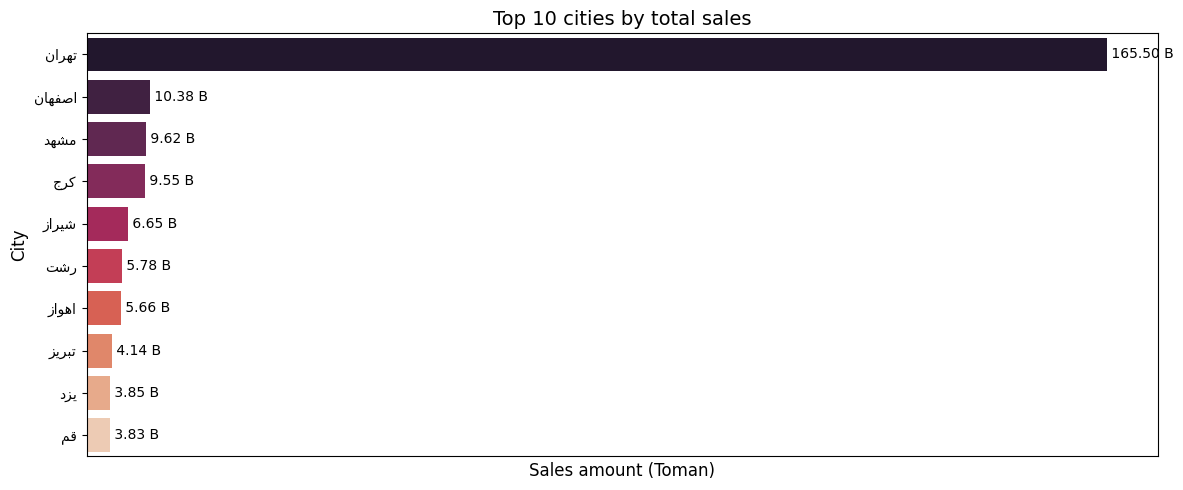

In [20]:
top_cities = (data_orders.groupby('city_name_fa')
              .agg({'TotalGrossValue':'sum'})
              .sort_values('TotalGrossValue', ascending=False)
              .head(10)
              .reset_index())
City_name = list(top_cities['city_name_fa'])

plt.figure(figsize=(12,5))
sns.barplot(data=top_cities, y='city_name_fa', x='TotalGrossValue', palette="rocket")

plt.title("Top 10 cities by total sales", fontsize=14)
plt.xlabel("Sales amount (Toman)", fontsize=12)
plt.ylabel("City", fontsize=12)

for i, v in enumerate(top_cities['TotalGrossValue']):
    plt.text(v, i, f" {v/1000000000:,.2f} B", va='center', ha='left', fontsize=10, color="black")

def farsi(texts):
    return [get_display(arabic_reshaper.reshape(t)) for t in texts]

plt.xticks([])
plt.yticks(range(len(City_name)), farsi(City_name))
plt.tight_layout()
plt.show()


### Checking the number of purchases per customer and the percentage of single-purchase customers

In [21]:
N_customer_purchases = data_orders.groupby('ID_Customer')['ID_Order'].count()\
     .sort_values(ascending=False)\
     .value_counts()

top_five = N_customer_purchases[:5]
five_or_more = N_customer_purchases[6:].sum()
top_five['+6'] = int(five_or_more)
Number_customer_purchases = pd.DataFrame(top_five).reset_index()
Number_customer_purchases.rename(columns={'ID_Order': 'purchase_count', 'count': 'num_customers'}, inplace=True)

Number_customer_purchases['percent'] = (Number_customer_purchases['num_customers']/data_orders['ID_Customer'].nunique()) * 100

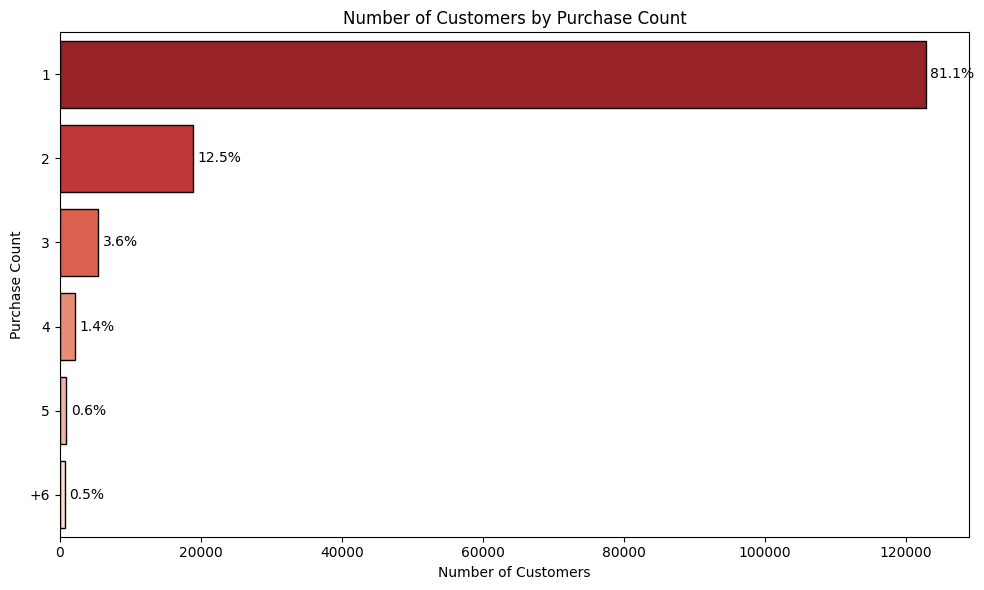

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=Number_customer_purchases, x="num_customers", y="purchase_count", palette="Reds_r", ax=ax, edgecolor='black')

ax.set_title("Number of Customers by Purchase Count", fontsize=12)
ax.set_xlabel("Number of Customers")
ax.set_ylabel("Purchase Count")

for i, (value, percent) in enumerate(zip(Number_customer_purchases["num_customers"], Number_customer_purchases["percent"])):
    ax.text(value + max(Number_customer_purchases["num_customers"]) * 0.005, i, f"{percent:.1f}%", va='center', ha='left', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()


In [23]:
data_orders.to_csv('cleaned_data.csv', index=False, encoding='utf-8-sig')

----------------